<a href="https://colab.research.google.com/github/SapientSapiens/ml-zoomcamp-2024/blob/main/homework/04/Homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the data into a dataframe
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# checking for null values in the dataset
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#### there appears to be no missing values in the original dataset

### Dataset Preparation

In [6]:
# selected columns as instructed
working_columns = ['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
df = df[working_columns]

In [7]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# getting the numerical columns for calculation of correlation
numerical_columns = list(df.dtypes[df.dtypes == 'int'].index)

numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
# getting the categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [11]:
# Make column values uniform in categorical columns
for cc in categorical_columns:
  df[cc] = df[cc].str.lower().str.replace(' ', '_')

In [12]:
# Replacing the values yes/no in y column with 1/0
df.y = (df.y == 'yes').astype(int)

In [13]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


### Splitting the data into 3 parts: train/validation/test with 60%/20%/20% distribution with random_state = 1

In [14]:
# import library for train test split
from sklearn.model_selection import train_test_split

In [15]:
# split original dataset into full_train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
# split full_train dataset into train and validation
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=1)

In [57]:
# checking the splits
len(df_train), len(df_val), len(df_test)

(27125, 9043, 9043)

In [19]:
# resetting the indices of the datasets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# setting the target variable
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [21]:
# ensuring that the target variables y is not in the datasets
del df_train['y']
del df_val['y']
del df_test['y']

# Question 1: ROC AUC feature importance

    ROC AUC could also be used to evaluate feature importance of numerical variables.

    Let's do that

      For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.

      Use the training dataset for that

    If your AUC is < 0.5, invert this variable by putting "-" in front
    (e.g. -df_train['engine_hp'])

    AUC can go below 0.5 if the variable is negatively correlated with the target variable.
    You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

    Which numerical variable (among the following 4) has the highest AUC?

    balance
    day
    duration
    previous

### For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.

In [23]:
# importing the required libraries
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [24]:
score = {}

for cc in numerical_columns:
  # calculate the AUC score
  auc = roc_auc_score(y_train, df_train[cc])

  # check whether calculated auc score < 0.5 and if yes, invert the same
  if auc < 0.5:
    auc =roc_auc_score(y_train, -df_train[cc])

  # append the score to the dictionary
  score[cc] = auc

  # print the AUC corresponding to the feature
  print(f'AUC for {cc} is {auc}')

# Numerical variable/feature having the highest AUC
print(f'\nNumerical variable/feature having the highest AUC is {max(score, key=score.get)}')

AUC for age is 0.5121718893992577
AUC for balance is 0.588819759177242
AUC for day is 0.5259654358875353
AUC for duration is 0.8146942424632446
AUC for campaign is 0.5714526215503108
AUC for pdays is 0.5901240684387066
AUC for previous is 0.5985621197852585

Numerical variable/feature having the highest AUC is duration


### So, the feature '`duration`' has the highest AUC

# Question 2: Training the model
    Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

    LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

    What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.69
    0.79
    0.89
    0.99

### Applying one-hot-encoding using DictVectorizer

In [25]:
# importing libraries for One-hot-encoding
from sklearn.feature_extraction import DictVectorizer

In [26]:
# creating an instance of the DictVectorizer
dv = DictVectorizer(sparse=False)

In [27]:
# creating a dictionary from complete dataset of train dataset/dataframe with categorical and numerical features/columns
train_dict = df_train[categorical_columns[:-1] + numerical_columns].to_dict(orient='records')

In [28]:
# creating the final train dataset by one-hot-encoding the categorical values in the dataset
X_train = dv.fit_transform(train_dict)

In [29]:
# creating a dictionary from complete dataset of validation dataset/dataframe with categorical and numerical features/columns
val_dict = df_val[categorical_columns[:-1] + numerical_columns].to_dict(orient='records')

In [30]:
# creating the final validation dataset by one-hot-encoding the categorical values in the dataset
X_val = dv.transform(val_dict)

### Fitting the model on the training dataset (Logistic Regression Training)

In [31]:
# importing libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [32]:
# initializing the model with the given parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [33]:
# training the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#### Calculating AUC

In [34]:
# getting the predicted probability on the data of the validation dataset with the model
y_pred_prob = model.predict_proba(X_val)[:, 1]
y_pred_prob

array([0.02905181, 0.02293493, 0.02112703, ..., 0.00211141, 0.03994585,
       0.03463577])

In [35]:
# calculating AUC
auc = roc_auc_score(y_val, y_pred_prob)
round(auc, 3)

0.9

#### Since the nearest among given options to 0.9 is 0.89, we can say the AUC of this trained model on the validation set is **`0.89`**

# Question 3: Precision and Recall

    Now let's compute precision and recall for our model.

      Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
      For each threshold, compute precision and recall
      Plot them

    At which threshold precision and recall curves intersect?

      0.265
      0.465
      0.665
      0.865

In [36]:
# setting the thresholds range
thresholds = np.linspace(0, 1, 101)

scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:

  predicted_positive = (y_pred_prob >= t)
  predicted_negative = (y_pred_prob < t)

  # setting the confusion matrix parameters
  tp = (predicted_positive & actual_positive).sum() # true positive
  tn = (predicted_negative & actual_negative).sum() # true negative
  fp = (predicted_positive & actual_negative).sum() # false positive
  fn = (predicted_negative & actual_positive).sum() # false negative

  scores.append((t, tp, fp, fn, tn))

In [37]:
# setting a dataframe for collating the confusion matrix values wrt the threshold
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

# calculating and adding the precision and recall columns to the dataframe
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

Intersection point:
Threshold: 0.27


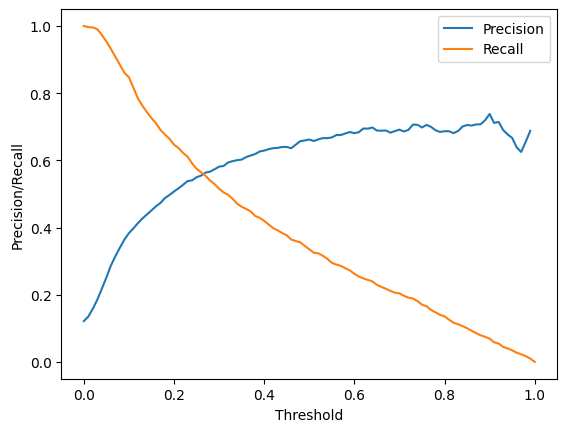

In [38]:
# plotting the precision and recall curves wrt the thresholds
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()

# Calculate the difference between precision and recall for each threshold
diff = np.abs(df_scores['precision'] - df_scores['recall'])

# Find the index of the minimum difference
min_diff_idx = np.argmin(diff)

# Get the intersection point
intersection_threshold = df_scores.threshold[min_diff_idx]

print("Intersection point:")
print("Threshold:", intersection_threshold)

#### Since the nearest among given options to 0.27 is 0.265, we conclude that the threshold at which the precision and recall curves intersect is **`0.265`**

# Question 4: F1 score

    Precision and recall are conflicting - when one grows, the other goes down.
    That's why they are often combined into the F1 score - a metrics that takes into account both

    This is the formula for computing F1:

    F1 = 2⋅P⋅R/(P+R)

    Where P is precision and R is recall.

    Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

    At which threshold F1 is maximal?

    0.02
    0.22
    0.42
    0.62

In [39]:
# we can use the earlier df_score dataframe for this problem
df_scores['f1'] = 2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

In [40]:
# finding threshold at which f1 score is maximum
df_scores[df_scores['f1'] == df_scores['f1'].max()]

,threshold,tp,fp,fn,tn,precision,recall,f1
23,0.23,671,576,427,7369,0.538091,0.611111,0.572281


Threshold with the highest F1 score: 0.23


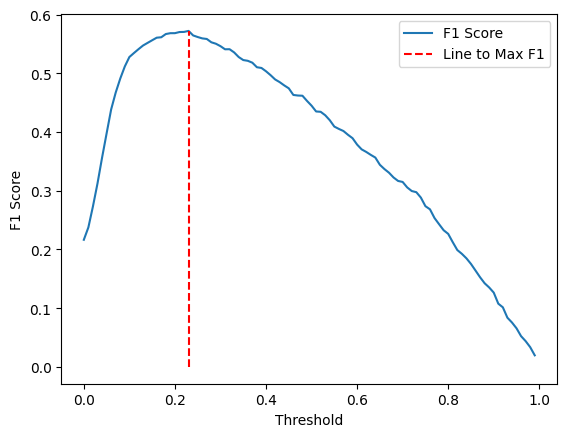

In [41]:
# plotting the F1 score curve wrt the thresholds
plt.plot(df_scores.threshold, df_scores['f1'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

# Find the index of the maximum F1 score
max_f1_index = df_scores['f1'].idxmax()

# Extract the corresponding threshold and F1 score
max_f1_threshold = df_scores.loc[max_f1_index, 'threshold']
max_f1_value = df_scores.loc[max_f1_index, 'f1']

# Draw the line from the maximum F1 point to the x-axis
plt.vlines(max_f1_threshold, 0, max_f1_value, colors='red', linestyles='dashed', label='Line to Max F1')
plt.legend()

# Print the threshold with the highest F1 score
print("Threshold with the highest F1 score:", max_f1_threshold)

### Since the nearest among given options to 0.23 is 0.22, we accept that the threshold at which F1 is maximal is **`0.22`**

# Question 5: 5-Fold CV

    Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

      KFold(n_splits=5, shuffle=True, random_state=1)

    *   Iterate over different folds of df_full_train
    *   Split the data into train and validation
    *   Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    *   Use AUC to evaluate the model on validation

    How large is standard deviation of the scores across different folds?

      0.0001
      0.006
      0.06
      0.26



    
    
    

In [71]:
# function to train model on different subsets of data
def train(df_train_Q, y_train_Q, C=1.0):
    dicts_Q = df_train_Q[categorical_columns[:-1] + numerical_columns].to_dict(orient='records')

    dv_Q = DictVectorizer(sparse=False)
    X_train_Q = dv_Q.fit_transform(dicts_Q)

    model_Q = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model_Q.fit(X_train_Q, y_train_Q)

    return dv_Q, model_Q

In [52]:
# function to get the prediction probability
def predict(df_Q, dv_Q, model_Q):
    dicts_Q = df_Q[categorical_columns[:-1] + numerical_columns].to_dict(orient='records')

    X_q = dv_Q.transform(dicts_Q)
    y_pred_Q = model_Q.predict_proba(X_q)[:, 1]

    return y_pred_Q

In [ ]:
# importing required librabries for creating the K Fold object
from sklearn.model_selection import KFold

In [ ]:
# creating the K Fold object
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [67]:
# importing required librabries for creating the K Fold object
from sklearn.model_selection import KFold

# creating the K Fold object
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# calculating AUC score iterating over the folds of the  df_full_train dataset
scores = []

df_full_train_Q5 = df_full_train.copy()

# kfold object returns indices each for the df_train and df_val datasets
for train_idx, val_idx in kfold.split(df_full_train_Q5):
  df_train_Q5 = df_full_train_Q5.iloc[train_idx]
  df_val_Q5 = df_full_train_Q5.iloc[val_idx]

  y_train_Q5 = df_train_Q5.y.values
  y_val_Q5 = df_val_Q5.y.values

  dv_Q5, model_Q5 = train(df_train_Q5, y_train_Q5)
  y_pred_Q5 = predict(df_val_Q5, dv_Q5, model_Q5)

  aucQ5 = roc_auc_score(y_val_Q5, y_pred_Q5)
  scores.append(aucQ5)

  print(f'AUC on validation set: {aucQ5}')

print()
print(f'Mean AUC score is {round(np.mean(scores), 3)} and their Standard Deviation is {round(np.std(scores), 3)}')

AUC on validation set: 0.8992842405563055
AUC on validation set: 0.8990110164487815
AUC on validation set: 0.9111641244449282
AUC on validation set: 0.9078905031338849
AUC on validation set: 0.9119728949040351

Mean AUC score is 0.906 and their Standard Deviation is 0.006


#### Hence we see that the standard deviation of the scores across different folds is as large as **`0.006`**

# Question 6: Hyperparameter Tuning


    Now let's use 5-Fold cross-validation to find the best parameter C

    1.Iterate over the following C values: [0.000001, 0.001, 1]
    2.Initialize KFold with the same parameters as previously
    3.Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    4.Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

    Which C leads to the best mean score?

      0.000001
      0.001
      1

    
    If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

#### We sahll use the same train and predict fucntion at Q5 for this task

In [63]:
!pip install tqdm

In [64]:
from tqdm.auto import tqdm

In [77]:
# number of splits to be same as in Q5
n_splits = 5

cparams = [0.000001, 0.001, 1]
mean_scores = {}

# creating a copy of the original dataset
df_full_train_Q6 = df_full_train.copy()

for c in tqdm(cparams):
  # Initializing KFold object with the same parameters as previously in Q5
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

  # to hold the scores
  scores = []

  #kfold object returns indices each for the df_train and df_val datasets
  for train_idx, val_idx in kfold.split(df_full_train_Q6):
    df_train_Q6 = df_full_train_Q6.iloc[train_idx]
    df_val_Q6 = df_full_train_Q6.iloc[val_idx]

    y_train_Q6 = df_train_Q6.y.values
    y_val_Q6 = df_val_Q6.y.values

    dv_Q6, model_Q6 = train(df_train_Q6, y_train_Q6, c)
    y_pred_Q6 = predict(df_val_Q6, dv_Q6, model_Q6)

    aucQ6 = roc_auc_score(y_val_Q6, y_pred_Q6)
    scores.append(aucQ6)

    print(f'for C ={c} AUC on validation set: {aucQ6}')

  print()
  print(f'for C ={c} Mean AUC score is {round(np.mean(scores), 3)} and their Standard Deviation is {round(np.std(scores), 3)}')
  mean_scores[np.mean(round(np.mean(scores), 3))] = c
  print()

print(f'The best mean score is {max(mean_scores, key=mean_scores.get)} with a C value of {mean_scores.get(max(mean_scores, key=mean_scores.get))}')
print(mean_scores)

  0%|          | 0/3 [00:00<?, ?it/s]

for C =1e-06 AUC on validation set: 0.6847426813003405
for C =1e-06 AUC on validation set: 0.700093195088892
for C =1e-06 AUC on validation set: 0.7120471006278472
for C =1e-06 AUC on validation set: 0.7087058212547206
for C =1e-06 AUC on validation set: 0.7016341366114567

for C =1e-06 Mean AUC score is 0.701 and their Standard Deviation is 0.009

for C =0.001 AUC on validation set: 0.8477454712494539
for C =0.001 AUC on validation set: 0.8598351175487567
for C =0.001 AUC on validation set: 0.8641643844105282
for C =0.001 AUC on validation set: 0.8690634472922144
for C =0.001 AUC on validation set: 0.8634086745172204

for C =0.001 Mean AUC score is 0.861 and their Standard Deviation is 0.007

for C =1 AUC on validation set: 0.8992842405563055
for C =1 AUC on validation set: 0.8990110164487815
for C =1 AUC on validation set: 0.9111641244449282
for C =1 AUC on validation set: 0.9078905031338849
for C =1 AUC on validation set: 0.9119728949040351

for C =1 Mean AUC score is 0.906 and thei

#### So it is seen that **`C = 1`** leads to best mean score